# Demo dbeef
Detect the lean meat region in a beef steak image.

## Description
Beucher's paradigm is applied for delineating sharply the lean meat region in the beef steak image. An internal and an external marker are necessary for the filtering step of the paradigm. In this step, small regions that does not have meat are eliminated.

In [1]:
import numpy as np
from PIL import Image
import ia870 as mm

## Reading
The gray-scale image of the beef steak is read.

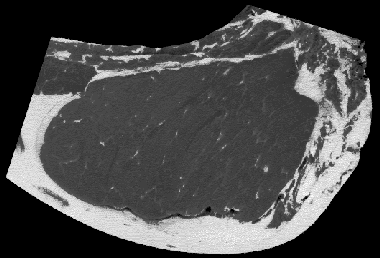

In [2]:
a_pil = Image.open('data/beef.tif').convert('L')
a_pil

## Filtering
The input image is simplified by the application of a a small closing. The dark area (inner lean part) is closed from the fat white area.

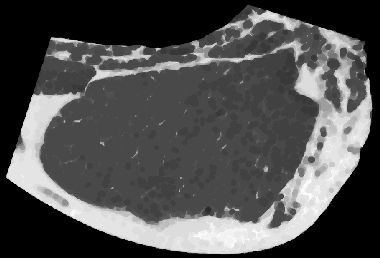

In [3]:
a = np.array(a_pil)
b = mm.iaclose(a, mm.iasedisk(2))
Image.fromarray(b)

## External marker 1/2
The external marker is built from the detection of the complete beef region and the extraction of its internal edge. As the beef is dark, it is detected by a low value threshold. After this threshold, small residual regions are eliminated by the binary areaclose operator.

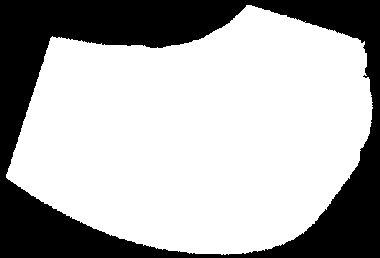

In [4]:
c = a >= 10
d = mm.iaareaclose(c,200)
Image.fromarray(d.astype(np.uint8)*255)

## External marker 2/2
The internal edge generated is 13 points thick. It is created by the residues of an erosion by a large structuring element.

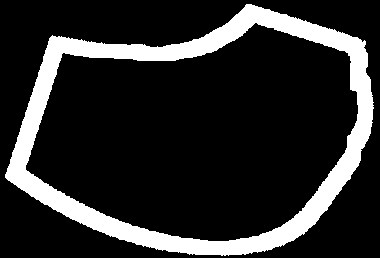

In [5]:
e = mm.iagradm(d, mm.iasecross(1), mm.iasebox(13))
Image.fromarray(e.astype(np.uint8)*255)

## Internal marker
The internal marker is a severe erosion of the steak. Both markers are combined by union and displayed as overlay on the gradient image.

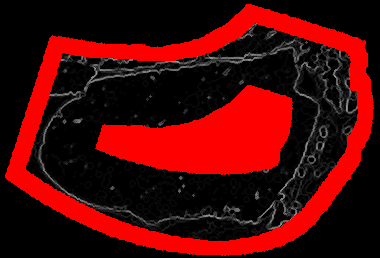

In [6]:
f = mm.iaero(d, mm.iasecross(80))
g = mm.iaunion(e,f)
h = mm.iagradm(b)
Image.fromarray(mm.iagshow(h,g).transpose(1,2,0))

## Watershed
Constrained watershed of the gradient of the smoothed image, restricted to the internal and external markers.

In [7]:
i = mm.iacwatershed(h,g)
Image.fromarray(i)

TypeError: iter() returned non-iterator of type 'wsDomain'

In [ ]:
h.shape, np.ones((3,3)).shape

In [ ]:
slicing = map(lambda orig, d: slice((d-1)//2, (d-1)//2 + orig), list(np.array(h.shape)), list(np.array(np.ones((3,3)).shape)))

In [ ]:
h[slicing]

In [ ]:
print(slice(2,4))

In [ ]:
list((np.array(h.shape) -1)//2)

In [ ]:
slicing = list(map(lambda orig, d: slice(d, orig), [10,10], [3,3]))

In [ ]:
h[slicing]